# Spectra

Useful links:<br>
https://docs.astropy.org/en/stable/api/astropy.modeling.physical_models.BlackBody.html

In [3]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Blackbody function
def blackbody(wave,temp):
    """
    Make a blackbody function
    
    Parameters
    ----------
    wave : numpy array
       Array of wavelength values in Angstroms.
    temp : float
       Temperature in K.
       
    Returns
    -------
    
    bb_lambda : numpy array
       Blackbody/Planck function.
       
    """
    wave_m = wave * 1e-10
    h = 6.62607015e-34  # Planck's constant [J s]
    c = 299792458.0     # speed of light [m/s]
    k = 1.380649e-23    # Boltzmann's constant [J / K]
    bb_lambda = (2 * h * c**2 / wave_m**5) / (np.exp((h*c)/(wave_m*k*temp))-1)
    # This now has units of W/m^2/m/sr, but it's more standard to use per nm or per Angstrom
    #  multipy by 1e-10 to convert to per Angstrom
    bb_lambda *= 1e-10
    
    return bb_lambda

In [5]:
wave = np.arange(1000,20000,1)

In [6]:
print(wave)

[ 1000  1001  1002 ... 19997 19998 19999]


In [7]:
bb = blackbody(wave,5000)
bb2 = blackbody(wave,6000)

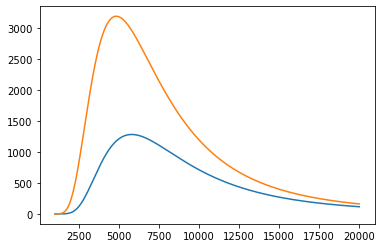

In [8]:
plt.plot(wave,bb)
plt.plot(wave,bb2)

# Exercises

**1) Find the Blackbody function for a star with temperature T=5777K.  Plot it versus wavelength for 1000 to 20,000 A in steps of 1A.**

In [9]:
wave = np.arange(1000,20000,1)

In [10]:
bb = blackbody(wave,5777)

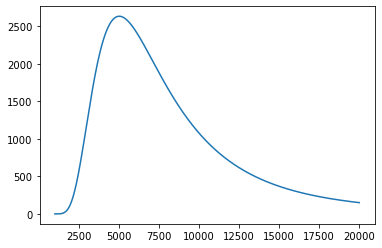

In [11]:
plt.plot(wave,bb)

**2) Plot the Blackbody functions for objects with temperatures 4000, 5777, and 7000K on a single plot using the same wavelength range as for question 1**

In [12]:
bb1 = blackbody(wave,4000)
bb2 = blackbody(wave,5777)
bb3 = blackbody(wave,7000)

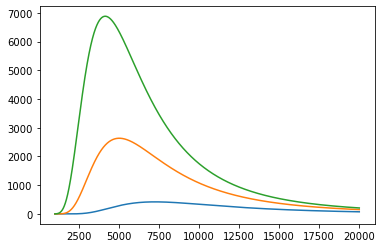

In [13]:
plt.plot(wave,bb1)
plt.plot(wave,bb2)
plt.plot(wave,bb3)

**2b) Plot the blackbody for 300 K. You might have to extend the x-axis to longer wavelengths.**

In [271]:
wave = np.arange(1000,200000,1)

In [272]:
bb1 = blackbody(wave,4000)
bb2 = blackbody(wave,5777)
bb3 = blackbody(wave,7000)
bb4 = blackbody(wave,1000)
bb5 = blackbody(wave,300)

(0.0001, 1000000.0)

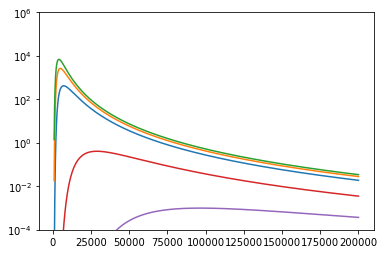

In [274]:
plt.plot(wave,bb1)
plt.plot(wave,bb2)
plt.plot(wave,bb3)
plt.plot(wave,bb4)
plt.plot(wave,bb5)
#plt.ylim(0,0.01)
plt.yscale('log')
plt.ylim(0.0001,1e6)

**3) Determine lambda-max for the four temperatures using Wien's Law.  Do these values make sense based on your blackbody curves?  Overplot the values on the curves with plt.vlines(x,ymin,ymax)**

In [277]:
wmax1 = 2.9e7/4000
wmax2 = 2.9e7/5777
wmax3 = 2.9e7/7000
wmax4 = 2.9e7/1000
wmax5 = 2.9e7/300

(0.0001, 1000000.0)

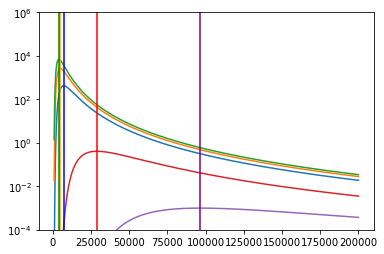

In [282]:
plt.plot(wave,bb1)
plt.plot(wave,bb2)
plt.plot(wave,bb3)
plt.plot(wave,bb4)
plt.plot(wave,bb5)
plt.vlines(wmax1,1e-4,1e6,color='blue')
plt.vlines(wmax2,1e-4,1e6,color='orange')
plt.vlines(wmax3,1e-4,1e6,color='green')
plt.vlines(wmax4,1e-4,1e6,color='red')
plt.vlines(wmax5,1e-4,1e6,color='purple')
#plt.ylim(0,0.01)
plt.yscale('log')
plt.ylim(0.0001,1e6)

**4) Integrate the blackbody functions in wavelength to get the total power (don't forget delta_lambda).  Compare the three values.  Do the results make sense based on the Stefan-Boltzmann Law.**

In [54]:
np.sum(bb)*3.14

59313232.04297275

In [52]:
sigma = 5.67e-8

In [53]:
sigma*5777.**4

63152788.143620506

**5) Compare your values to what you get from the Stefan-Boltzmann law.  Do they agree?**

# Colors

In [34]:
wave = np.arange(1000,20000,1)

In [35]:
bb4000 = blackbody(wave,4000)
bb5777 = blackbody(wave,5777)
bb7000 = blackbody(wave,7000)

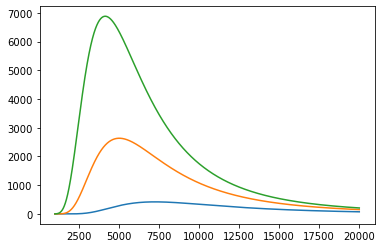

In [36]:
plt.plot(wave,bb4000)
plt.plot(wave,bb5777)
plt.plot(wave,bb7000)

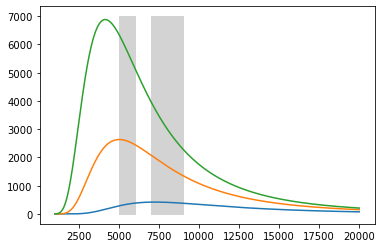

In [37]:
plt.plot(wave,bb4000)
plt.plot(wave,bb5777)
plt.plot(wave,bb7000)
plt.fill_between([5000,6000,6000,5000,5000],[0,0,7000,7000,0],color='lightgray')  # V-band
plt.fill_between([7000,9000,9000,7000,7000],[0,0,7000,7000,0],color='lightgray')  # I-band


In [38]:
ind5=np.where(wave==5000)[0][0]
ind6=np.where(wave==6000)[0][0]
ind7=np.where(wave==7000)[0][0]
ind9=np.where(wave==9000)[0][0]
print(ind5,ind6,ind7,ind9)

4000 5000 6000 8000


In [55]:
# Sum up flux in V-band filter
vflux = np.sum(bb4000[ind5:ind6])
print('V-band summed Flux = ',vflux)

V-band summed Flux =  339695.57192292775


In [56]:
# Convert to magnitudes
vmag = -2.5*np.log10(vflux)
print('V = ',vmag)

V =  -13.827724714231502


In [57]:
V4000 = -2.5*np.log10(np.sum(bb4000[ind5:ind6]))
I4000 = -2.5*np.log10(np.sum(bb4000[ind7:ind9]))
print('V4000 = ',V4000)
print('I4000 = ',I4000)
V5777 = -2.5*np.log10(np.sum(bb5777[ind5:ind6]))
I5777 = -2.5*np.log10(np.sum(bb5777[ind7:ind9]))
print('V5777 = ',V5777)
print('I5777 = ',I5777)
V7000 = -2.5*np.log10(np.sum(bb7000[ind5:ind6]))
I7000 = -2.5*np.log10(np.sum(bb7000[ind7:ind9]))
print('V7000 = ',V7000)
print('I7000 = ',I7000)

V4000 =  -13.827724714231502
I4000 =  -14.773765760363265
V5777 =  -16.024986833156728
I5777 =  -16.328564670076478
V7000 =  -16.90261928302394
I7000 =  -16.964696865912014


In [58]:
# Now make the colors
VI4000 = V4000-I4000
print('V-I(4000) = ',VI4000)
VI5777 = V5777-I5777
print('V-I(5777) = ',VI5777)
VI7000 = V7000-I7000
print('V-I(7000) = ',VI7000)

V-I(4000) =  0.9460410461317625
V-I(5777) =  0.30357783691975015
V-I(7000) =  0.06207758288807241


Text(0, 0.5, 'V-I Color')

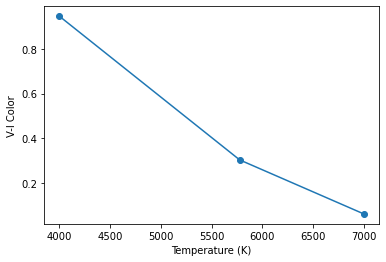

In [50]:
# Plot versus temperature
plt.scatter([4000,5777,7000],[VI4000,VI5777,VI7000])
plt.plot([4000,5777,7000],[VI4000,VI5777,VI7000])
plt.xlabel('Temperature (K)')
plt.ylabel('V-I Color')